In [1]:
pip install scikit-learn pandas numpy matplotlib

In [12]:
# Download the spam dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
!unzip smsspamcollection.zip
!mv SMSSpamCollection spam.csv

--2025-08-24 12:14:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘smsspamcollection.zip.1’

smsspamcollection.z     [   <=>              ] 198.65K   385KB/s    in 0.5s    

2025-08-24 12:14:41 (385 KB/s) - ‘smsspamcollection.zip.1’ saved [203415]

Archive:  smsspamcollection.zip
  inflating: SMSSpamCollection       
replace readme? [y]es, [n]o, [A]ll, [N]one, [r]ename: read
new name: read
  inflating: read                    


Now that the dataset is downloaded, let's run the code again to train the model.

✅ Accuracy: 0.9829596412556054

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       0.97      0.91      0.94       160

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



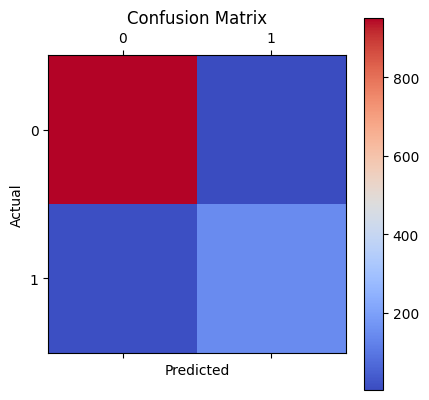

In [24]:
# Import dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset (example: spam.csv)
# Dataset should have columns like ["label", "message"]
data = pd.read_csv("spam.csv", encoding='latin-1', sep='\t')[['ham','Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...']]
data.columns = ['label','message']

# Encode labels (ham=0, spam=1)
data['label_num'] = data.label.map({'ham':0, 'spam':1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    data['message'], data['label_num'], test_size=0.2, random_state=42
)

# Text vectorization
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Model training (Naive Bayes)
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap='coolwarm')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Attempting to download the dataset again from a different source and re-run the code to train the model.

In [25]:
# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the coefficients from the model (for MultinomialNB, these are log probabilities)
# We'll look at the coefficients for the 'spam' class (class 1)
spam_token_probs = model.feature_log_prob_[1]

# Create a pandas Series to easily sort and view the probabilities
token_probs_series = pd.Series(spam_token_probs, index=feature_names)

# Sort the tokens by their probability in descending order to see the most indicative words for spam
print("Top 20 words most indicative of spam:")
print(token_probs_series.sort_values(ascending=False).head(20))

# Similarly, look at the words most indicative of ham (class 0)
ham_token_probs = model.feature_log_prob_[0]
token_probs_series_ham = pd.Series(ham_token_probs, index=feature_names)

print("\nTop 20 words most indicative of ham:")
print(token_probs_series_ham.sort_values(ascending=False).head(20))

Top 20 words most indicative of spam:
to       -3.686617
call     -4.365112
you      -4.522297
your     -4.625296
free     -4.766947
the      -4.869895
for      -4.906709
now      -4.906709
or       -4.984670
txt      -5.099081
is       -5.099081
on       -5.236951
ur       -5.263384
from     -5.309054
stop     -5.309054
mobile   -5.318444
text     -5.366762
have     -5.376713
and      -5.396915
with     -5.471023
dtype: float64

Top 20 words most indicative of ham:
you    -3.639782
to     -3.813979
the    -4.172782
and    -4.458970
in     -4.500103
me     -4.543001
is     -4.559368
my     -4.596347
it     -4.645480
of     -4.921243
that   -4.935563
for    -4.952533
but    -5.119809
have   -5.119809
not    -5.125606
so     -5.125606
are    -5.143202
can    -5.152118
your   -5.167155
on     -5.207346
dtype: float64


In [19]:
# Load a small portion of the data to inspect column names
try:
    temp_data = pd.read_csv("spam.csv", encoding='latin-1', sep='\t', nrows=5)
    print("Columns found in the dataset:")
    print(temp_data.columns)
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

Columns found in the dataset:
Index(['ham', 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'], dtype='object')
